In [298]:
from dataloader import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
sb.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm

In [299]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')

In [300]:
trainX.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,NaN,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,NaN,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,low,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,NaN,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,NaN,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core


In [301]:
trainY.head()

0     514500.0
1     995400.0
2    8485000.0
3    2626000.0
4    1764000.0
Name: price, dtype: float64

In [302]:
trainX.shape

(20254, 20)

In [303]:
# Check if we have duplicate records in the dataset (we don't)
trainX_copy = trainX.copy()
trainX_copy.drop_duplicates()
trainX_copy.shape 

(20254, 20)

In [293]:
print(trainX['num_beds'].describe())
print()
print(trainX['num_baths'].describe())
print()
print(trainX['size_sqft'].describe())

count    20174.000000
mean         3.122931
std          1.281658
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: num_beds, dtype: float64

count    19820.000000
mean         2.643542
std          1.473835
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: num_baths, dtype: float64

count    2.025400e+04
mean     1.854364e+03
std      1.354343e+04
min      0.000000e+00
25%      8.070000e+02
50%      1.119000e+03
75%      1.528000e+03
max      1.496000e+06
Name: size_sqft, dtype: float64


In [304]:
# trainX['property_type'].value_counts() # 39 distinct values (tricky column as we cannot ignore this field)
# trainX['num_beds'].value_counts() # 10 distinct values (1 to 10)
# trainX['num_baths'].value_counts() # 10 distinct values (1 to 10)
# trainX['tenure'].value_counts().count() # 11 distinct values (can apply encoding)
# trainX['built_year'].value_counts()
trainX['floor_level'].value_counts() # eliminate this column as most values are NaN
# trainX['furnishing'].value_counts() # 5 distinct values (can apply one-hot encoding)
# trainX['subzone'].value_counts() # 244 distinct values (cannot be considered for regression analysis)
#trainX['planning_area'].value_counts() # 43 distinct values (might be conisidered for regression analysis)


high                1674
low                  719
mid                  705
ground               178
top                  116
penthouse             97
high (70 total)        4
ground (9 total)       4
low (17 total)         2
high (25 total)        2
low (23 total)         1
high (23 total)        1
mid (25 total)         1
high (9 total)         1
high (17 total)        1
high (10 total)        1
mid (9 total)          1
Name: floor_level, dtype: int64

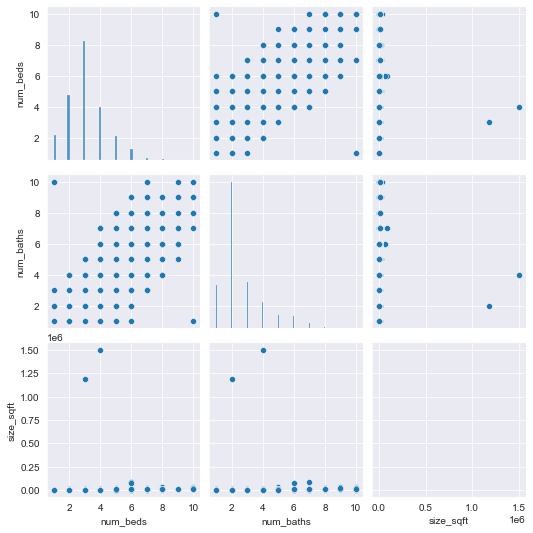

In [306]:
sb.pairplot(trainX, vars=['num_beds', 'num_baths', 'size_sqft'])

In [307]:
trainX.drop(['listing_id', 'title', 'address', 'property_name', 'property_details_url', 'floor_level', 'elevation'], axis=1, inplace = True)
print('trainX.shape = {}'.format(trainX.shape))

trainX.shape = (20254, 13)


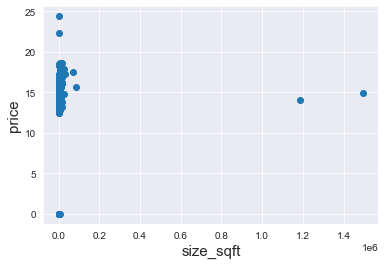

In [308]:
fig, ax = plt.subplots()
ax.scatter(x = trainX['size_sqft'], y = np.log1p(trainY))
plt.ylabel('price', fontsize=15)
plt.xlabel('size_sqft', fontsize=15)
plt.show()

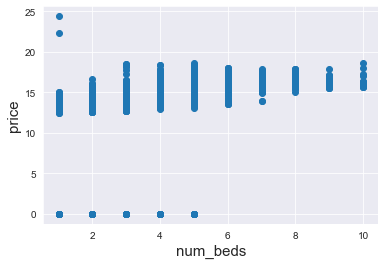

In [309]:
fig, ax = plt.subplots()
ax.scatter(x = trainX['num_beds'], y = np.log1p(trainY))
plt.ylabel('price', fontsize=15)
plt.xlabel('num_beds', fontsize=15)
plt.show()

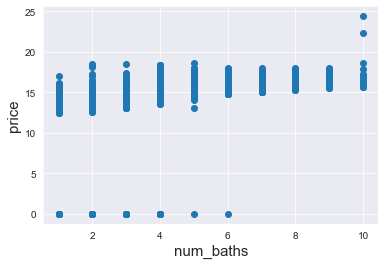

In [310]:
fig, ax = plt.subplots()
ax.scatter(x = trainX['num_baths'], y = np.log1p(trainY))
plt.ylabel('price', fontsize=15)
plt.xlabel('num_baths', fontsize=15)
plt.show()

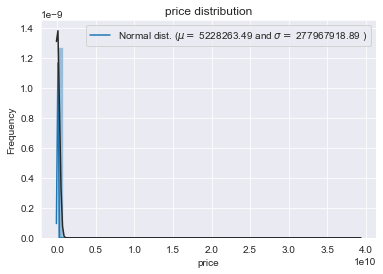

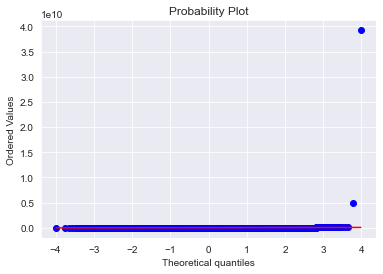

In [311]:
sb.distplot(trainY , fit=norm);
(mu, sigma) = norm.fit(trainY)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')
fig = plt.figure()
res = stats.probplot(trainY, plot=plt)
plt.show()

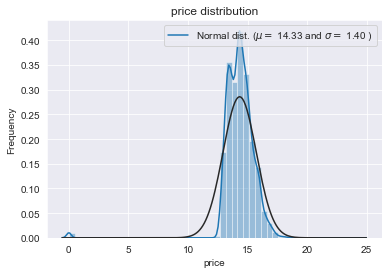

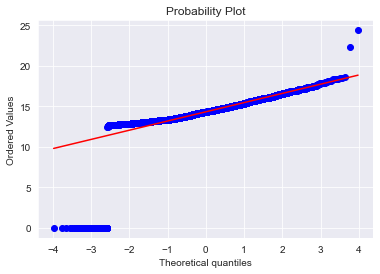

In [312]:
trainY_log = np.log1p(trainY)
 
sb.distplot(trainY_log , fit=norm);
(mu, sigma) = norm.fit(trainY_log)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')
fig = plt.figure()
res = stats.probplot(trainY_log, plot=plt)
plt.show()

In [313]:
# Ratio of the number of data samples which have NA to the total number of data samples in training set
all_data_na = (trainX.isnull().sum() / len(trainX)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})

for each_na_feature in np.transpose(missing_data).columns:
    print('{}, dtype = {}'.format(each_na_feature, trainX[str(each_na_feature)].dtype))

missing_data.head(15)

total_num_units, dtype = float64
tenure, dtype = object
available_unit_types, dtype = object
built_year, dtype = float64
num_baths, dtype = float64
subzone, dtype = object
planning_area, dtype = object
num_beds, dtype = float64


,Missing Ratio
total_num_units,27.905599
tenure,8.506962
available_unit_types,7.114644
built_year,4.552187
num_baths,2.142787
subzone,0.557914
planning_area,0.557914
num_beds,0.394984


Text(0.5, 1.0, '% missing data by feature')

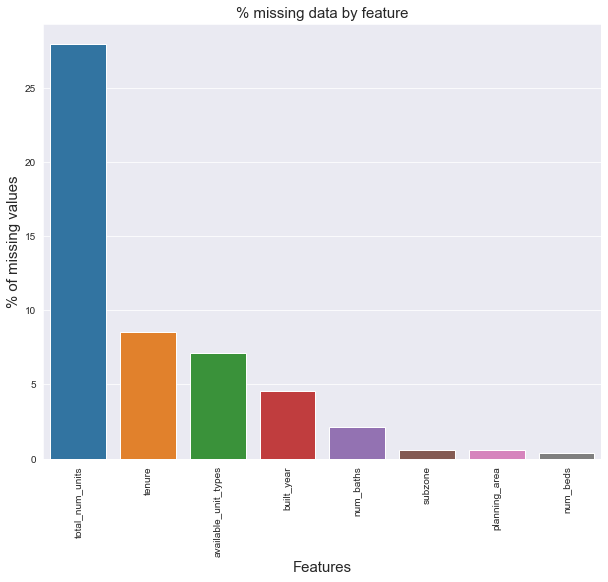

In [179]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sb.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('% of missing values', fontsize=15)
plt.title('% missing data by feature', fontsize=15)

In [315]:
# treatment of float type features with NaN values (we fill it the most frequently occuring value)
for each_na_column in ['total_num_units', 'built_year', 'num_baths', 'num_beds']:
    trainX[each_na_column] = trainX[each_na_column].fillna(trainX[each_na_column].mode()[0])

# treatment of object type features with null values (we create a separate category called None)
for each_na_column in ['tenure', 'available_unit_types', 'subzone', 'planning_area']:
    trainX[each_na_column] = trainX[each_na_column].fillna('None')

In [316]:
# Verify if there is any more missing data
all_data_na = (trainX.isnull().sum() / len(trainX)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [317]:
# Correlation of the price feature with the rest of the numerical features in the training dataset
# We see that the elevation feature can be dropped from the dataset (dropped it already)
df_trainY = pd.DataFrame(data=trainY, columns=['price'])
column_names = list(trainX.columns.values)
column_names.append('price')
train_X_Y = pd.concat([trainX, df_trainY],axis=1, ignore_index=True, sort=False)
train_X_Y.columns = column_names

corr_matrix = train_X_Y.corr()
print(corr_matrix['price'].sort_values(ascending=False))

price              1.000000
num_baths          0.049991
total_num_units    0.003643
size_sqft          0.000805
lng                0.000150
lat               -0.000516
num_beds          -0.004297
built_year        -0.004798
Name: price, dtype: float64


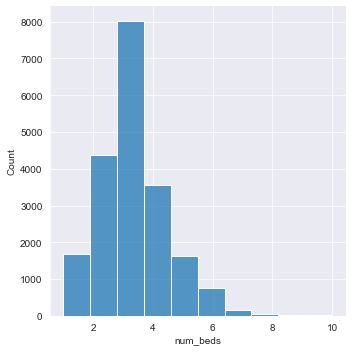

In [318]:
sb.displot(trainX, x='num_beds', bins=10)

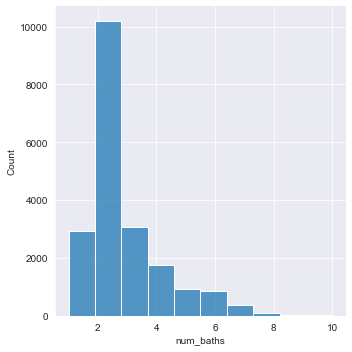

In [319]:
sb.displot(trainX, x='num_baths', bins=10)

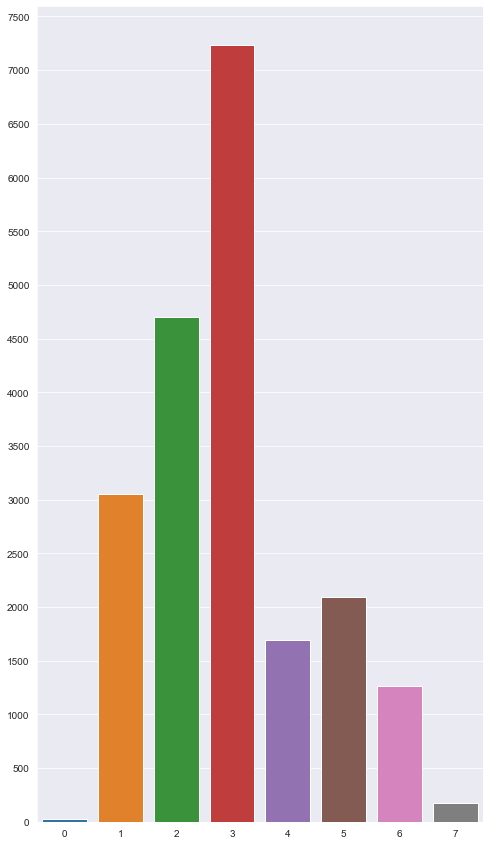

In [320]:
bins = [100, 300, 700, 1000, 1500, 2000, 5000, 10000, 20000]
hist, _ = np.histogram(trainX['size_sqft'], bins=bins)
plt.figure(figsize=(8, 15))
ax = sb.barplot(x = list(range(len(hist))), y = hist)
ax.set_yticks(100 * np.arange(0, 80, 5))
plt.show()

In [228]:
trainX[trainX['size_sqft'] > 20000] # 7 data samples where the size_sqft is greater than 20,000

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,available_unit_types,total_num_units,lat,lng,subzone,planning_area
1649,bungalow,freehold,2011.0,10.0,10.0,30000,unspecified,"3, 4, 5, 6, 7, 8, 10 br",638.0,1.346020,103.867198,lorong chuan,serangoon
2701,condo,946-year leasehold,2008.0,3.0,2.0,1185000,unfurnished,3 br,36.0,1.379105,103.960613,pasir ris park,pasir ris
4287,semi-detached house,freehold,1970.0,6.0,7.0,86080,unspecified,"5, 6, 10 br",638.0,1.306408,103.932790,siglap,bedok
13461,terraced house,99-year leasehold,1997.0,6.0,5.0,25003,unspecified,"2, 4, 5, 6 br",339.0,1.352481,103.699082,yunnan,jurong west
13589,bungalow,freehold,1990.0,8.0,9.0,27500,unspecified,"3, 5, 6, 8 br",17.0,1.311925,103.824001,nassim,tanglin
15637,Bungalow,freehold,1997.0,6.0,6.0,70000,unspecified,"4, 5, 6, 7 br",638.0,1.335877,103.789611,swiss club,bukit timah
18446,condo,99-year leasehold,2023.0,4.0,4.0,1496000,unspecified,"studio, 1, 2, 3, 4 br",1074.0,1.304855,103.773776,dover,queenstown


In [247]:
trainX[trainX['size_sqft'] <= 100] # 3 data samples where the size_sqft is less than 100

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,available_unit_types,total_num_units,lat,lng,subzone,planning_area
5682,condo,99-year leasehold,2025.0,5.0,4.0,0,unspecified,"1, 2, 3, 4, 5 br",640.0,1.308012,103.767318,clementi woods,clementi
14825,hdb,99-year leasehold,1974.0,2.0,2.0,65,unspecified,"studio, 1, 2, 3, 4, 5, 6 br",638.0,1.307529,103.794888,holland drive,queenstown
17623,hdb 4 rooms,99-year leasehold,2001.0,3.0,2.0,92,unspecified,"1, 2, 3, 4 br",638.0,1.388463,103.891307,anchorvale,sengkang


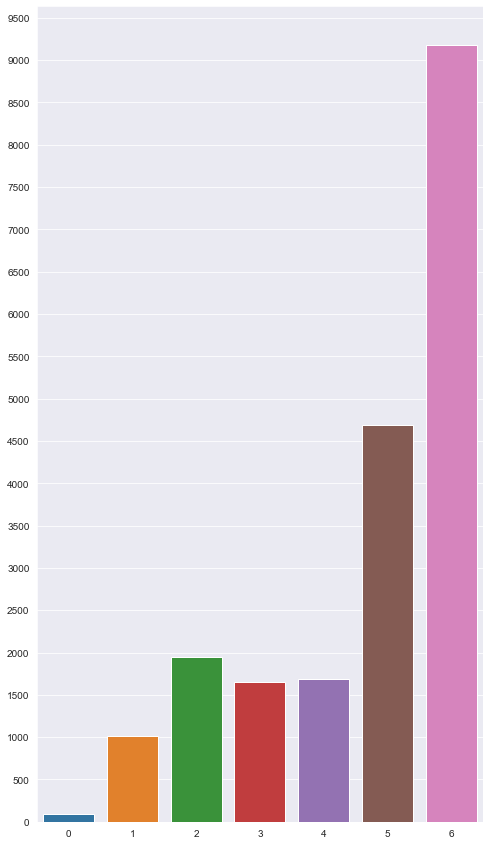

In [285]:
bins = np.arange(1960, 2031, 10)
hist, _ = np.histogram(trainX['built_year'], bins=bins)
plt.figure(figsize=(8, 15))
ax = sb.barplot(x = list(range(len(hist))), y = hist)
ax.set_yticks(100 * np.arange(0, 100, 5))
plt.show()

In [284]:
trainX[trainX['built_year'] > 2022] # 7660 data samples where the property built_year is in the future

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,available_unit_types,total_num_units,lat,lng,subzone,planning_area
3,Condo,freehold,2023.0,3.0,2.0,958,partial,"studio, 1, 2, 3, 4 br",638.0,1.312364,103.803271,farrer court,bukit timah
4,condo,99-year leasehold,2026.0,2.0,1.0,732,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,1.273959,103.843635,anson,downtown core
5,condo,freehold,2024.0,2.0,2.0,689,unspecified,"studio, 1, 2, 3, 4, 5 br",633.0,1.339338,103.763893,bukit batok south,bukit batok
6,condo,99-year leasehold,2026.0,3.0,2.0,1076,unspecified,"studio, 1, 2, 3, 4, 5 br",407.0,1.310640,103.852149,kampong java,kallang
7,bungalow,999-year leasehold,2023.0,5.0,6.0,11500,unspecified,"2, 3, 4, 5, 6, 7 br",638.0,1.342340,103.784489,swiss club,bukit timah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20248,corner terrace,freehold,2023.0,5.0,6.0,4973,unspecified,"3, 5, 6, 7 br",638.0,1.321145,103.813679,tyersall,tanglin
20249,condo,99-year leasehold,2026.0,2.0,2.0,635,unspecified,"1, 2, 3, 4 br",605.0,1.385938,103.834466,tagore,ang mo kio
20250,Condo,freehold,2026.0,2.0,2.0,883,unspecified,"1, 2, 3, 4 br",137.0,1.315948,103.857589,lavender,kallang
20251,condo,freehold,2023.0,4.0,4.0,1378,unspecified,"studio, 1, 2, 3, 4, 5 br",340.0,1.315961,103.836848,moulmein,novena
